In [1]:
import pandas as pd

from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


# Models
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Scoring
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Set file name
file_name = 'df.csv'

df = pd.read_csv(file_name)

# We don't want these features
df = df.drop(['time', 'x28', 'x61'], axis=1)

In [3]:
# Get features and target
X = df.drop(['y'], axis=1)
y = df.y
#train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [4]:
# Scale data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Plots confusion matrix, accuracy, and auc roc score

def plot_confusion_matrix(y_pred, y_test, prob_score):
    """   
    :param y_pred: "Predictions for target variable"
    :param y_test: "Actual values for target variable"
    :param prob_score: "Probabilities that each value is of the positive class"
    :return: 
    """
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Used to calculate precision and recall
    tn = conf_matrix[0][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    
    fig = plt.figure(figsize=(8, 8))
    LABELS = ["Normal", "Break"]
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
    print("=========================")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC SCORE: {roc_auc_score(y_test, y_prob)}")
    print(f"PRECISION : {precision}")
    print(f"RECALL: {recall}")
    print("=========================")
    

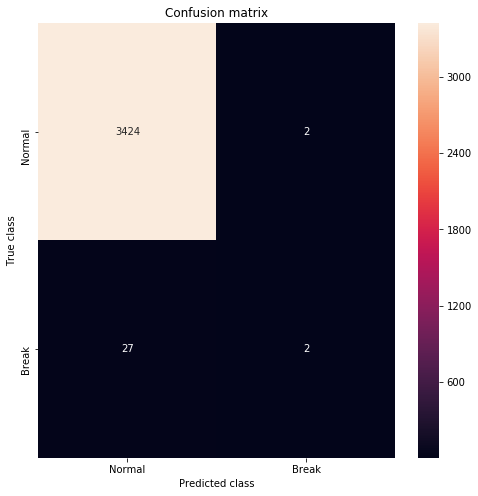

ACCURACY SCORE: 0.9916063675832127
ROC AUC SCORE: 0.5342110030798961
PRECISION : 0.5
RECALL: 0.06896551724137931


In [8]:
# Basic adaboost
clf = AdaBoostClassifier()
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1] # the 1 index is probability of positive class
y_prob[y_pred == 0] = 0

plot_confusion_matrix(y_pred, y_test, y_prob)

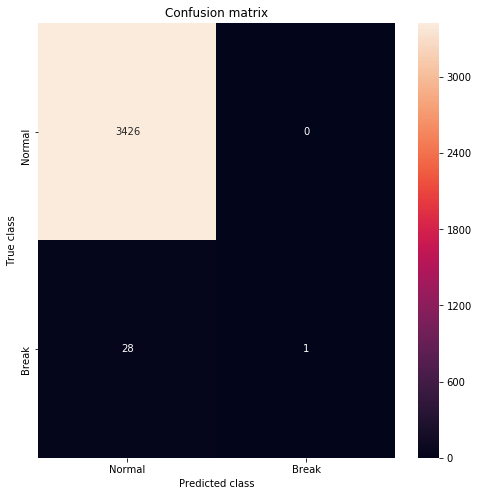

ACCURACY SCORE: 0.9918958031837916
ROC AUC SCORE: 0.5172413793103449
PRECISION : 1.0
RECALL: 0.034482758620689655


In [9]:
# Hyperparameter tuning
clf = AdaBoostClassifier()
param_dist = {
 'n_estimators': [10,50,70,100],
 'learning_rate' : [0.05,0.1,0.3,0.5,1]
 }

grid = GridSearchCV(clf, param_dist, n_jobs=-1, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
y_prob = grid.predict_proba(X_test)[:,1]
y_prob[y_pred == 0] = 0


plot_confusion_matrix(y_pred, y_test, y_prob)

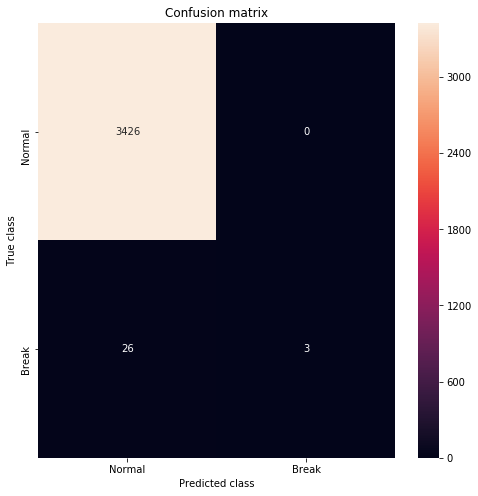

ACCURACY SCORE: 0.9924746743849493
ROC AUC SCORE: 0.5517241379310345
PRECISION : 1.0
RECALL: 0.10344827586206896


In [10]:
# Basic XGBoost
clf = xgb.XGBClassifier(scale_pos_weight=5)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1] # the 1 index is probability of positive class
y_prob[y_pred == 0] = 0

plot_confusion_matrix(y_pred, y_test, y_prob)

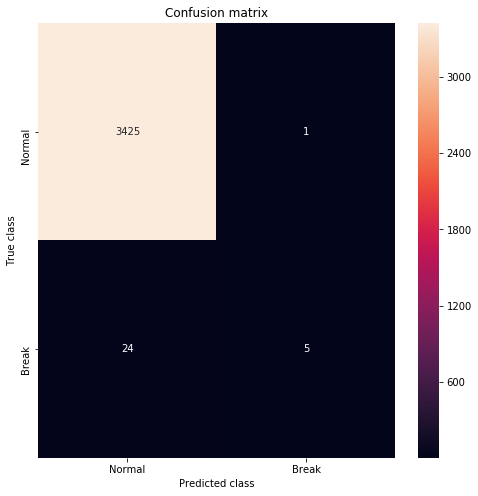

ACCURACY SCORE: 0.9927641099855282
ROC AUC SCORE: 0.5860861163113714
PRECISION : 0.8333333333333334
RECALL: 0.1724137931034483


In [11]:
# Hyperparameter XGBoost 

clf = xgb.XGBClassifier(scale_pos_weight=5)
param_dist = {
 'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
 'max_depth' : [2,4,6,8,10]
 }

grid = GridSearchCV(clf, param_dist, n_jobs=-1, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
y_prob = grid.predict_proba(X_test)[:,1]
y_prob[y_pred == 0] = 0

plot_confusion_matrix(y_pred, y_test, y_prob)

In [12]:
grid.best_params_

{'eta': 0.01, 'max_depth': 8}